In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'processing_ready_data.xlsx'
df = pd.read_excel(io=file_name)

df_no_outliers = df[df.weekly_minutes < 500]

In [66]:
df_male = df[df['gender'] == 'Mężczyzna']
df_female = df[df['gender'] == 'Kobieta']

In [97]:
df.extreme_score.median()

2.811240721102863

(array([22., 46., 28., 43., 29., 24., 13., 14.,  7.,  9.]),
 array([1.07900318, 1.57110286, 2.06320255, 2.55530223, 3.04740191,
        3.53950159, 4.03160127, 4.52370095, 5.01580064, 5.50790032,
        6.        ]),
 <BarContainer object of 10 artists>)

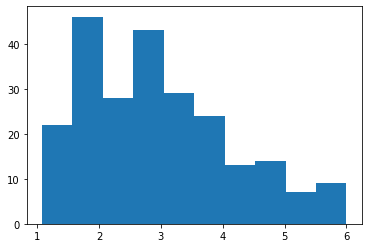

In [107]:
plt.hist(df.extreme_score, bins=10)

In [102]:
from scipy import stats

stats.shapiro(df.extreme_score)

ShapiroResult(statistic=0.9513651132583618, pvalue=4.2465256910872995e-07)

(array([79., 42., 33., 19., 21.,  8., 11.,  3.,  1.,  3.,  1.,  2.,  0.,
         4.,  1.,  0.,  0.,  0.,  0.,  7.]),
 array([ 0.5  ,  1.525,  2.55 ,  3.575,  4.6  ,  5.625,  6.65 ,  7.675,
         8.7  ,  9.725, 10.75 , 11.775, 12.8  , 13.825, 14.85 , 15.875,
        16.9  , 17.925, 18.95 , 19.975, 21.   ]),
 <BarContainer object of 20 artists>)

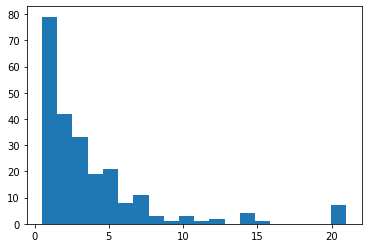

In [100]:
plt.hist(sorted(df.weekly_session), bins=20)

In [11]:
import pingouin as pg

pg.cronbach_alpha(data=df[['extreme_1', 'extreme_2', 'extreme_3', 'extreme_4', 'extreme_5', 'extreme_6', 'extreme_7', 'extreme_8']])

(0.7966855089017079, array([0.755, 0.834]))

In [108]:
def negative_bold(val):
    bold = 'bold' if 1 > abs(val) > 0.2 else ''
    return f'font-weight: {bold}'

df[df.columns[2:]].corr('spearman')[8:].style.applymap(negative_bold)

,extreme_1,extreme_2,extreme_3,extreme_4,extreme_5,extreme_6,extreme_7,extreme_8,extreme_score,PPCS_1,PPCS_2,PPCS_3,PPCS_4,PPCS_5,PPCS_6,PPCS_score,PPCS_7,well-being,father_relations,mother_relations,friends_relations,romantic_life,sexual_life,reenacting,weekly_session,session_time,weekly_minutes,age,in_relationship,believes_in_god
extreme_score,0.126065,0.433504,0.675224,0.656019,0.702955,0.793316,0.759228,0.684718,1.000000,0.415919,0.425603,0.323486,0.352572,0.175875,0.192490,0.439934,0.499024,-0.033981,-0.073511,-0.162943,-0.019017,-0.052436,-0.018258,0.340020,0.441275,0.141899,0.453473,0.017267,0.060061,-0.085034
PPCS_1,0.147714,0.451781,0.324841,0.260188,0.306061,0.347274,0.271024,0.164546,0.415919,1.000000,0.530391,0.556393,0.535806,0.302343,0.494090,0.740826,0.314123,-0.074593,-0.114895,-0.160948,-0.049873,-0.127875,-0.101381,0.376607,0.494065,0.156928,0.511856,0.079131,-0.036221,0.049703
PPCS_2,0.166516,0.361662,0.350936,0.269432,0.276945,0.317567,0.302242,0.230686,0.425603,0.530391,1.000000,0.436816,0.457716,0.311914,0.308849,0.717730,0.356302,-0.123652,-0.063413,-0.127866,-0.010157,-0.180190,-0.138068,0.286723,0.504916,0.057124,0.447447,0.190519,-0.083947,-0.017714
PPCS_3,0.097120,0.249555,0.206794,0.299621,0.274513,0.167596,0.235286,0.236277,0.323486,0.556393,0.436816,1.000000,0.623965,0.498044,0.461743,0.744043,0.383232,-0.178245,-0.039094,-0.215891,-0.161753,-0.173303,-0.117047,0.182573,0.352105,0.225522,0.449316,0.078850,-0.054974,0.135347
PPCS_4,0.224860,0.353590,0.301677,0.279433,0.302723,0.227077,0.215936,0.203617,0.352572,0.535806,0.457716,0.623965,1.000000,0.507708,0.538612,0.766929,0.523611,-0.144467,-0.135200,-0.186050,-0.120820,-0.142932,-0.085606,0.133218,0.368887,0.176897,0.442119,0.008754,-0.038742,0.243179
PPCS_5,0.053684,0.132120,0.164163,0.164082,0.136140,0.067480,0.162235,0.135199,0.175875,0.302343,0.311914,0.498044,0.507708,1.000000,0.431439,0.691041,0.367448,-0.151417,0.007965,-0.029169,-0.061467,-0.157233,-0.183069,0.062055,0.302743,0.094241,0.323559,-0.054161,-0.144415,0.209572
PPCS_6,0.086522,0.220889,0.134271,0.186044,0.156570,0.106489,0.157167,0.154878,0.192490,0.494090,0.308849,0.461743,0.538612,0.431439,1.000000,0.668892,0.331146,-0.222631,-0.106869,-0.125784,-0.106742,-0.242969,-0.181528,0.143656,0.277843,0.141345,0.321479,-0.101452,-0.152426,0.163628
PPCS_score,0.154389,0.370645,0.372248,0.317701,0.338282,0.292449,0.297517,0.267202,0.439934,0.740826,0.717730,0.744043,0.766929,0.691041,0.668892,1.000000,0.502315,-0.201887,-0.086769,-0.149723,-0.071028,-0.237858,-0.191707,0.274417,0.527279,0.181328,0.551434,0.030613,-0.137246,0.138147
PPCS_7,0.064195,0.143729,0.288888,0.348118,0.330159,0.334534,0.462340,0.458326,0.499024,0.314123,0.356302,0.383232,0.523611,0.367448,0.331146,0.502315,1.000000,-0.182360,-0.147955,-0.231437,-0.130086,-0.153902,-0.081950,0.134028,0.269920,0.197129,0.344720,-0.036526,-0.067360,0.109372
well-being,0.020361,-0.006781,-0.054897,0.036020,-0.003535,-0.019596,-0.046652,-0.027147,-0.033981,-0.074593,-0.123652,-0.178245,-0.144467,-0.151417,-0.222631,-0.201887,-0.182360,1.000000,0.261818,0.409991,0.461491,0.401752,0.394571,0.027440,-0.103089,-0.066277,-0.108670,0.034889,0.142968,-0.019118


In [147]:
from sklearn import linear_model

x = df_male[['extreme_score']]
y = df_male['PPCS_score']

regr = linear_model.LinearRegression()
regr.fit(x, y)

regr.score(x, y)


0.17554466747188424

In [159]:
from scipy import stats

x = df['extreme_score']
y = df['PPCS_7']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

r_value * r_value, p_value

(0.3111992295732141, 1.2740453473566692e-20)

In [157]:
stats.spearmanr(df.extreme_score, df.PPCS_7)

SpearmanrResult(correlation=0.49902430178104373, pvalue=3.3467205209398596e-16)